### Proceso para la realización de predicciones mediante Machine Learning (ML)

1. **Comprender el problema:** antes de obtener la información, procuramos entender el problema que estamos tratando de resolver. En esto es clave conocer el dominio, pensar en qué factores podrían desempeñar un papel importante para la solución del problema. Si no seconoce el dominio, hay que leer sobre él. 

2. **Generación de hipótesis:** Esto es bastante importante, sin embargo, a menudo se olvida. En palabras simples, la generación de hipótesis se refiere a la creación de un conjunto de características que podrían influir en la variable objetivo dado un intervalo de confianza (tomado como 95% todo el tiempo). Podemos hacer esto antes de mirar los datos para evitar pensamientos sesgados. Este paso a menudo ayuda a crear nuevas características. 

3. **Obtener datos:** en este punto, descargamos los datos y los vemos. Se determina qué características están disponibles y cuáles no, cuántas características incluidas en la generación de hipótesis dieron en el blanco y cuáles podrían crearse. Responder estas preguntas encaminan el análisis. 

4. **Exploración de datos:** No se puede determinar todo simplemente mirando los datos. Se requiere cavar más profundo. Este paso ayuda a comprender la naturaleza de las variables (función de varianza cero sesgada, faltante) para que puedan tratarse adecuadamente. Implica la creación de tablas, gráficos (análisis univariante y bivariante) y tablas cruzadas para comprender el comportamiento de las características. 

5. **Preprocesamiento de datos:** Aquí, se imputan valores perdidos y variables de cadena limpias (eliminar espacio, pestañas irregulares, formato de hora de datos) y cualquier cosa que no deba estar allí para poder procesar. Este paso generalmente se sigue junto con la etapa de *exploración de datos*. 

6. **Ingeniería de funciones:** en esta etapa, se crean y agregan nuevas características al conjunto de datos. La mayoría de las ideas para estas características vienen durante la etapa de *generación de hipótesis*. 

7. **Entrenamiento del modelo:** Usando un algoritmo adecuado, se entrena el modelo en el conjunto de datos dado. 

8. **Evaluación del modelo:** una vez que el modelo está ajustado(entrenado), se evalua el rendimiento del modelo utilizando una métrica de error adecuada. Aquí, también se busca identificar la importancia de las variables, es decir, qué variables han demostrado ser significativas para determinar la variable objetivo. Y, en consecuencia, se puede preseleccionar las mejores variables y entrenar al modelo nuevamente. 

9. **Prueba de modelo:** Finalmente, se evalua el modelo en el conjunto de datos no vistos (datos de prueba/validación/evaluación).

<img src="imagenes/CRISP-DM.png" width="50%">

<img src="imagenes/CRISP-DM_1.png" width="50%">

### 1. Entender el problema

* El conjunto de datos pertenece a las transacciones por PSE que realizó un subconjnto de cliente y no clientes de Bancolombia.

* Es una muestra de datos de erca de 12 MM de transacciones, vía PSE, ocurridas entre en un periodo de tiempo entre 2016-09 y 2018-09.

### 2. Generación de hipótesis

Este punto es interesante. ¿Qué factores se pueden pensar en este momento que pueden influir en la categorización de estabñecimientos y de esta manera encontrar el flujo de gastos de un usuario vs. el nivel de ingresos reportado? 

Con base en un criterio de decisión (por ejemplo, nivel de significancia del 5%), siempre 'rechazamos' o 'no rechazamos' la hipótesis nula en lenguaje estadístico. Prácticamente, mientras construimos modelos, buscamos valores de probabilidad (p). Si p valor <0.05, rechazamos la hipótesis nula. Si p> 0.05, no podemos rechazar la hipótesis nula. Algunos factores que se pueden pensar que influyen directamente son los siguientes:

       * Ocupacion
       * Tipo vivienda
       * Nivel académico
       * Edad del cliente
       * Estado civil
       * Genero
       * Edad
       * Rango de ingresos

### 3. Obtener datos

Se obtiene una base en formato CSV y se cargar en el IDE de python Jupyter, usando Anaconda para Windows. Además, se consulta la metadata de las variables. El conjunto de datos (transacciones) consta de 11 variables. Se plantea como una experiencia interesante de exploración de datos. Dado que son datos reales se tiene un número de características limitado pero un número de registros considerable.

También se cuenta on un cojunto de datos tipo catálogo de los pagadores con característ9cas importantes de cada uno de ellos que pueden ayudar a identificar esa correlación existente con sus gastos (transacciones realizadas) vs. su nivel de ingresos.

## Variables del Dataset

### Variables de los pagadores (Información demográfica de los pagadores):

* id_cliente: id. único de cliente (pagador)
* seg_str : segmento estructural 
* ocupacion: ocupación
* tipo_vivienda: tipo de vivienda
* nivel_academico: nivel académico
* estado_civil: estado civil
* genero: genero
* edad: edad
* ingreso_rango: rango de ingreso estimado 


### Variables de los pagadores (transacciones PSE durante 2016-09 a 2018-10):

* id_trn_ach: identificador único de transacción
* id_cliente: id. único de cliente (pagador) 
* fecha: fecha de transacción
* hora: hora de transacción (HHMMSS)
* valor_trx: valor de la transacción
* ref1: texto libre referencia 1
* ref2: texto libre referencia 2
* ref3: texto libre referencia 3
* sector: sector eco. receptor
* subsector: subsector eco. receptor
* descripcion: descripción subsector receptor

### 4. Exploración de datos

La exploración de datos es la clave para obtener información de los mismo. Una buena estrategia de exploración de datos puede resolver incluso problemas complicados en unas pocas horas. Una buena estrategia de exploración de datos comprende lo siguiente:

   * ***Análisis univariado:*** se usa para visualizar una variable en un gráfico. Ejemplos: histograma, diagrama de densidad, etc.
   
   * ***Análisis bivariado:*** se usa para visualizar dos variables (ejes x e y) en una gráfica. Ejemplos: gráfico de barras, gráfico de líneas, gráfico de áreas, etc.
  
   * ***Análisis multivariado:*** como su nombre lo sugiere, se usa para visualizar más de dos variables a la vez. Ejemplos: gráfico de barras apiladas, gráfico de barras esquivado, etc.
   
   * ***Tablas cruzadas:*** se usan para comparar el comportamiento de dos variables categóricas (también se usan en tablas dinámicas).

Para comenzar se cargan las bibliotecas y datos necesarios e iniciamos la codificación.

### * Importación de librerías

In [2]:
#cargando librerias
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.datasets import make_circles
from matplotlib.colors import Normalize
from time import time
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm

### * Carga del conjunto de datos

Carga del conjunto de datos de pagadores

In [3]:
df_pagadores = pd.read_csv('datos\dt_info_pagadores_muestra\dt_info_pagadores_muestra.csv',header=None)
#error_bad_lines=False

In [4]:
df_pagadores.columns=['id_cliente','seg_str','ocupacion','tipo_vivienda','nivel_academico','estado_civil','genero','edad','ingreso_rango']
df_pagadores.head()

,id_cliente,seg_str,ocupacion,tipo_vivienda,nivel_academico,estado_civil,genero,edad,ingreso_rango
0,18,PERSONAL PLUS,5,O,U,M,M,92,e. (4.4 5.5MM]
1,32,PERSONAL PLUS,E,F,T,M,M,80,i. (8.7 Inf)
2,41,EMPRENDEDOR,3,O,I,W,M,90,b. (1.1 2.2MM]
3,47,EMPRENDEDOR,7,NaN,I,I,M,86,c. (2.2 3.3MM]
4,71,PERSONAL,5,O,S,M,M,79,e. (4.4 5.5MM]


Se verifica la información del conjunto de datos de pagadores usando el comando info ().

In [5]:
df_pagadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338606 entries, 0 to 338605
Data columns (total 9 columns):
id_cliente         338606 non-null int64
seg_str            338606 non-null object
ocupacion          331773 non-null object
tipo_vivienda      166396 non-null object
nivel_academico    294313 non-null object
estado_civil       332006 non-null object
genero             332897 non-null object
edad               338606 non-null object
ingreso_rango      338606 non-null object
dtypes: int64(1), object(8)
memory usage: 23.3+ MB


In [6]:
df_pagadores['id_cliente'] = df_pagadores['id_cliente'].astype(str) 

In [7]:
df_pagadores.head()

,id_cliente,seg_str,ocupacion,tipo_vivienda,nivel_academico,estado_civil,genero,edad,ingreso_rango
0,18,PERSONAL PLUS,5,O,U,M,M,92,e. (4.4 5.5MM]
1,32,PERSONAL PLUS,E,F,T,M,M,80,i. (8.7 Inf)
2,41,EMPRENDEDOR,3,O,I,W,M,90,b. (1.1 2.2MM]
3,47,EMPRENDEDOR,7,NaN,I,I,M,86,c. (2.2 3.3MM]
4,71,PERSONAL,5,O,S,M,M,79,e. (4.4 5.5MM]


Carga del conjunto de datos de transacciones por personas

In [8]:
df_personas = pd.read_csv('datos\dt_trxpse_personas_2016_2018_muestra_adjt\dt_trxpse_personas_2016_2018_muestra_adjt.csv', sep='\n', header=None)

Se carga la información como una sola columna dado que la información tiene comas(,) dentro de sus textos lo que puede producir error al cargar como un csv convencional

In [9]:
df_personas.columns=['col']
df_personas.head()

,col
0,"230435642,3,20161207,113451,2122392.51,CC,,,\N..."
1,"222356110,10,20161016,3424,148438.37,Referenci..."
2,"309137749,10,20180120,195042,94025.19,CC,,,\N,..."
3,"324614737,10,20180326,192146,94430.07000000001..."
4,"235344690,18,20170106,201317,670645.5699999999..."


Luego se hace un split por coma (,) en el cual el campo descripción se abre en varas columnas adicionales

In [10]:
df_personas1 = pd.DataFrame(list(df_personas.col.str.split(',')))
df_personas1.columns=['id_trn_ach','id_cliente','fecha','hora','valor_trx','ref1','ref2','ref3','sector','subsector','desc1','desc2','desc3','desc4','desc5','desc6']
df_personas1.head()

,id_trn_ach,id_cliente,fecha,hora,valor_trx,ref1,ref2,ref3,sector,subsector,desc1,desc2,desc3,desc4,desc5,desc6
0,230435642,3,20161207,113451,2122392.51,CC,,,\N,\N,\N,None,None,None,None,None
1,222356110,10,20161016,3424,148438.37,Referencia: Contrato: Valor:,CC,,\N,\N,\N,None,None,None,None,None
2,309137749,10,20180120,195042,94025.19,CC,,,\N,\N,\N,None,None,None,None,None
3,324614737,10,20180326,192146,94430.07000000001,CC,,,\N,\N,\N,None,None,None,None,None
4,235344690,18,20170106,201317,670645.5699999999,MEDICINA PREPAGADA COLSANITAS,CE,,\N,\N,\N,None,None,None,None,None


Se comprueba si el conjunto de datos tiene valores perdidos.

In [11]:
df_personas1.columns[df_personas1.isnull().any()]

Index(['id_cliente', 'fecha', 'hora', 'valor_trx', 'ref1', 'ref2', 'ref3',
       'sector', 'subsector', 'desc1', 'desc2', 'desc3', 'desc4', 'desc5',
       'desc6'],
      dtype='object')

De las 11 variables, 10 características tienen valores perdidos. Se va a verificar el porcentaje de valores perdidos en estas columnas. Se verificar el porcentaje de valores perdidos en estas columnas:

In [12]:
#Conteo de valores perdidos en las columnas identificadas
perdidos = df_personas1.isnull().sum()/len(df_personas1)
perdidos = perdidos[perdidos > 0]
perdidos.sort_values(inplace=True, ascending=False)
perdidos = perdidos.to_frame()
perdidos.columns = ['cantidad']
perdidos.index.names = ['Variable']
perdidos['Variable'] = perdidos.index
perdidos.reset_index
perdidos

,cantidad,Variable
Variable,,
desc6,0.999998,desc6
desc5,0.999975,desc5
desc4,0.999907,desc4
desc3,0.999847,desc3
desc2,0.998067,desc2
desc1,0.002094,desc1
subsector,0.002094,subsector
sector,0.002094,sector
ref3,0.002094,ref3


Se puede inferir que a parte de la descripción, las demás varoables no alcanzan ni a tener un 1% de valores perdidos lo cual es un buen punto de partida sobre la calidad de la información. A continuación se presenta una imagen que explica estos valores perdidos usando una gráfica de barras.

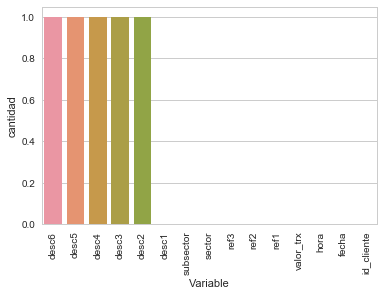

In [13]:
#ploteando el conteo de valores perdidos con seaborn
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Variable', y = 'cantidad', data=perdidos)
plt.xticks(rotation = 90)
plt.show()

In [14]:
df_personas2 = df_personas1.copy()

In [15]:
df_personas2.head()

,id_trn_ach,id_cliente,fecha,hora,valor_trx,ref1,ref2,ref3,sector,subsector,desc1,desc2,desc3,desc4,desc5,desc6
0,230435642,3,20161207,113451,2122392.51,CC,,,\N,\N,\N,None,None,None,None,None
1,222356110,10,20161016,3424,148438.37,Referencia: Contrato: Valor:,CC,,\N,\N,\N,None,None,None,None,None
2,309137749,10,20180120,195042,94025.19,CC,,,\N,\N,\N,None,None,None,None,None
3,324614737,10,20180326,192146,94430.07000000001,CC,,,\N,\N,\N,None,None,None,None,None
4,235344690,18,20170106,201317,670645.5699999999,MEDICINA PREPAGADA COLSANITAS,CE,,\N,\N,\N,None,None,None,None,None


Ocupamos los valores nulos a caracteres vacíos con el motivo de poder concatener de nuevo lass columnas abiertas de descripciones y generar finalmente el dataset que esperabamos:

In [16]:
df_personas2.fillna('', inplace=True)

In [17]:
df_personas2.head()

,id_trn_ach,id_cliente,fecha,hora,valor_trx,ref1,ref2,ref3,sector,subsector,desc1,desc2,desc3,desc4,desc5,desc6
0,230435642,3,20161207,113451,2122392.51,CC,,,\N,\N,\N,,,,,
1,222356110,10,20161016,3424,148438.37,Referencia: Contrato: Valor:,CC,,\N,\N,\N,,,,,
2,309137749,10,20180120,195042,94025.19,CC,,,\N,\N,\N,,,,,
3,324614737,10,20180326,192146,94430.07000000001,CC,,,\N,\N,\N,,,,,
4,235344690,18,20170106,201317,670645.5699999999,MEDICINA PREPAGADA COLSANITAS,CE,,\N,\N,\N,,,,,


In [18]:
df_personas2['descripcion'] = df_personas2['desc1']+df_personas2['desc2']+df_personas2['desc3']+df_personas2['desc4']+df_personas2['desc5']+df_personas2['desc6']
df_personas_new = df_personas2[['id_trn_ach','id_cliente','fecha','hora','valor_trx','ref1','ref2','ref3','sector','subsector','descripcion']]
df_personas_new.head(50)

,id_trn_ach,id_cliente,fecha,hora,valor_trx,ref1,ref2,ref3,sector,subsector,descripcion
0,230435642,3,20161207,113451,2122392.51,CC,,,\N,\N,\N
1,222356110,10,20161016,3424,148438.37,Referencia: Contrato: Valor:,CC,,\N,\N,\N
2,309137749,10,20180120,195042,94025.19,CC,,,\N,\N,\N
3,324614737,10,20180326,192146,94430.07000000001,CC,,,\N,\N,\N
4,235344690,18,20170106,201317,670645.5699999999,MEDICINA PREPAGADA COLSANITAS,CE,,\N,\N,\N
5,320049316,18,20180307,143513,706933.7,RECAUDO COLSANITAS,CC,,\N,\N,\N
6,230519178,19,20161207,155840,306773.79,CC,,,\N,\N,\N
7,241307506,19,20170210,142809,701067.98,Pago de la Planilla Cesantias,CEDULA DE CIUDADANIA,,SERVICIOS FINANCIEROS,OTROS SERVICIOS FINANCIEROS,Otras actividades auxiliares de las actividade...
8,316193109,24,20180220,153148,767571.01,CC,,,\N,\N,\N
9,282076350,26,20170914,70026,100277.45,Pago de la factura # CONJUNTO RESIDENCIAL PIET...,IDC,,\N,\N,\N


Se verifica la información del conjunto de datos de personas usando el comando info ().

In [19]:
df_personas_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11866506 entries, 0 to 11866505
Data columns (total 11 columns):
id_trn_ach     object
id_cliente     object
fecha          object
hora           object
valor_trx      object
ref1           object
ref2           object
ref3           object
sector         object
subsector      object
descripcion    object
dtypes: object(11)
memory usage: 995.9+ MB


Sacamos algunas estadisticas de cada variable

In [20]:
df_personas_new.describe()

,id_trn_ach,id_cliente,fecha,hora,valor_trx,ref1,ref2,ref3,sector,subsector,descripcion
count,11866506,11866506,11866506,11866506,11866506,11866506,11866506,11866506,11866506,11866506,11866506
unique,11854861,338613,762,85065,10069786,487655,171907,1,12,56,162
top,Valor:,CC,20180502,\N,\N,CC,,,\N,\N,\N
freq,11249,12039,37354,12127,12127,1154094,5076660,11866506,8534270,8534270,8534270


Ahora unimos la información de los 2 datasets para poder hacer el análisis completo

In [21]:
df_merge_outer = pd.merge(df_personas_new, df_pagadores, how='outer', on=['id_cliente'])

In [22]:
df_merge_outer.head(1000)

,id_trn_ach,id_cliente,fecha,hora,valor_trx,ref1,ref2,ref3,sector,subsector,descripcion,seg_str,ocupacion,tipo_vivienda,nivel_academico,estado_civil,genero,edad,ingreso_rango
0,230435642,3,20161207,113451,2122392.51,CC,,,\N,\N,\N,PERSONAL,9,O,U,M,M,89,b. (1.1 2.2MM]
1,361824463,3,20180817,150348,281540.86,CC,,,\N,\N,\N,PERSONAL,9,O,U,M,M,89,b. (1.1 2.2MM]
2,262592810,3,20170606,111904,272212.87,CC,,,\N,\N,\N,PERSONAL,9,O,U,M,M,89,b. (1.1 2.2MM]
3,331954119,3,20180424,162336,97813.49000000001,CC,,,\N,\N,\N,PERSONAL,9,O,U,M,M,89,b. (1.1 2.2MM]
4,216109953,3,20160906,134421,256739.15,CC,,,\N,\N,\N,PERSONAL,9,O,U,M,M,89,b. (1.1 2.2MM]
5,216110987,3,20160906,134815,87811.17,CC,,,\N,\N,\N,PERSONAL,9,O,U,M,M,89,b. (1.1 2.2MM]
6,230497384,3,20161207,150304,254316.25,CC,,,\N,\N,\N,PERSONAL,9,O,U,M,M,89,b. (1.1 2.2MM]
7,268087654,3,20170705,120247,259531.22,CC,,,\N,\N,\N,PERSONAL,9,O,U,M,M,89,b. (1.1 2.2MM]
8,303092215,3,20171221,125017,89957.78999999999,CC,,,\N,\N,\N,PERSONAL,9,O,U,M,M,89,b. (1.1 2.2MM]
9,262596108,3,20170606,112704,94216.46000000001,CC,,,\N,\N,\N,PERSONAL,9,O,U,M,M,89,b. (1.1 2.2MM]


In [23]:
df_merge_outer.dtypes

id_trn_ach         object
id_cliente         object
fecha              object
hora               object
valor_trx          object
ref1               object
ref2               object
ref3               object
sector             object
subsector          object
descripcion        object
seg_str            object
ocupacion          object
tipo_vivienda      object
nivel_academico    object
estado_civil       object
genero             object
edad               object
ingreso_rango      object
dtype: object

Ahora si podemos sacar las estadísticas de todas las variables (de los 2 datasets unidos)

In [24]:
df_merge_outer.describe()

,id_trn_ach,id_cliente,fecha,hora,valor_trx,ref1,ref2,ref3,sector,subsector,descripcion,seg_str,ocupacion,tipo_vivienda,nivel_academico,estado_civil,genero,edad,ingreso_rango
count,11866506,11866506,11866506,11866506,11866506,11866506,11866506,11866506,11866506,11866506,11866506,11853782,11437712,7240848,10891605,11472832,11451639,11853782,11853782
unique,11854861,338613,762,85065,10069786,487655,171907,1,12,56,162,5,15,8,9,7,2,109,11
top,Valor:,CC,20180502,\N,\N,CC,,,\N,\N,\N,PERSONAL,1,F,U,S,F,33,i. (8.7 Inf)
freq,11249,12039,37354,12127,12127,1154094,5076660,11866506,8534270,8534270,8534270,6449445,7279924,3679349,5761241,5392023,5787672,474210,2506217


### 5. Preprocesamiento de los datos

En esta etapa, se trata con valores atípicos, variables de codificación, imputar valores perdidos y tomar todas las iniciativas posibles que puedan eliminar inconsistencias del conjunto de datos. 

Hacemos alguna limpieza de datos por el nivel de ruido con la que viene

In [25]:
df_filtrado = df_merge_outer.loc[df_merge_outer['id_cliente']!='CC']
df_filtrado = df_filtrado.loc[df_filtrado['valor_trx']!='']
df_filtrado = df_filtrado.loc[df_filtrado['fecha']!='']
df_filtrado = df_filtrado.loc[df_filtrado['id_trn_ach']!='']

In [26]:
df_filtrado.describe()

,id_trn_ach,id_cliente,fecha,hora,valor_trx,ref1,ref2,ref3,sector,subsector,descripcion,seg_str,ocupacion,tipo_vivienda,nivel_academico,estado_civil,genero,edad,ingreso_rango
count,11853782,11853782,11853782,11853782,11853782,11853782,11853782,11853782,11853782,11853782,11853782,11853782,11437712,7240848,10891605,11472832,11451639,11853782,11853782
unique,11853782,338606,761,85063,10069784,487654,171907,1,12,56,162,5,15,8,9,7,2,109,11
top,241163579,210949,20180502,94501,0.99,CC,,,\N,\N,\N,PERSONAL,1,F,U,S,F,33,i. (8.7 Inf)
freq,1,6187,37354,344,155,1154094,5063936,11853782,8534270,8534270,8534270,6449445,7279924,3679349,5761241,5392023,5787672,474210,2506217


A continuación, se separan las variables numéricas y categóricas, explorando estos datos desde un ángulo diferente., sin embargo se observa que por el ruido con el que los datos se presentan, no existe ninguna variable numérica

In [27]:
#separar variables en nuevos dataframes
numeric_data = df_filtrado.select_dtypes(include=[np.number])
cat_data = df_filtrado.select_dtypes(exclude=[np.number])
print ("Hay {} variables numéricas y {} columnas categóricas en el dataset".format(numeric_data.shape[1],cat_data.shape[1]))

Hay 0 variables numéricas y 19 columnas categóricas en el dataset


In [28]:
cat_data.head()

,id_trn_ach,id_cliente,fecha,hora,valor_trx,ref1,ref2,ref3,sector,subsector,descripcion,seg_str,ocupacion,tipo_vivienda,nivel_academico,estado_civil,genero,edad,ingreso_rango
0,230435642,3,20161207,113451,2122392.51,CC,,,\N,\N,\N,PERSONAL,9,O,U,M,M,89,b. (1.1 2.2MM]
1,361824463,3,20180817,150348,281540.86,CC,,,\N,\N,\N,PERSONAL,9,O,U,M,M,89,b. (1.1 2.2MM]
2,262592810,3,20170606,111904,272212.87,CC,,,\N,\N,\N,PERSONAL,9,O,U,M,M,89,b. (1.1 2.2MM]
3,331954119,3,20180424,162336,97813.49000000001,CC,,,\N,\N,\N,PERSONAL,9,O,U,M,M,89,b. (1.1 2.2MM]
4,216109953,3,20160906,134421,256739.15,CC,,,\N,\N,\N,PERSONAL,9,O,U,M,M,89,b. (1.1 2.2MM]


Al realizar la limpieza de datos podemos ver que ahora tenemos un conjunto mas reducido de varables con datos perdidos que los podemos analizar de mejor manera

In [29]:
#Conteo de valores perdidos en las columnas identificadas
perdidos = df_filtrado.isnull().sum()/len(df_filtrado)
perdidos = perdidos[perdidos > 0]
perdidos.sort_values(inplace=True, ascending=False)
perdidos = perdidos.to_frame()
perdidos.columns = ['cantidad']
perdidos.index.names = ['Variable']
perdidos['Variable'] = perdidos.index
perdidos.reset_index
perdidos

,cantidad,Variable
Variable,,
tipo_vivienda,0.389153,tipo_vivienda
nivel_academico,0.081170,nivel_academico
ocupacion,0.035100,ocupacion
genero,0.033925,genero
estado_civil,0.032137,estado_civil


Observamos que solo la variable tipo_vivienda supera un 30% de datos perdidos, en cambio el resto de variables, no alcanza a superar el 10% de datos perdidos

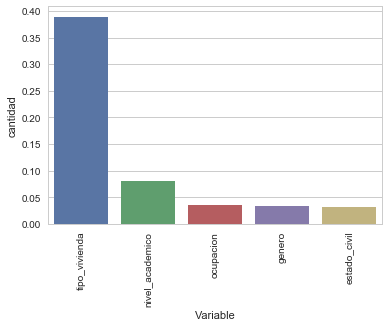

In [30]:
#ploteando el conteo de valores perdidos con seaborn
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Variable', y = 'cantidad', data=perdidos)
plt.xticks(rotation = 90)
plt.show()

Para poder hacer un óptimo análisis multivariado, necesitamos convertr las variables categóricas a numéricas. Para esto usamos la función LabelEncoder de sklearn

In [31]:
df_filtrado.fillna('', inplace=True)

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ctext=list(cat_data)

In [33]:
print (ctext[11])
print (ctext[12])
print(ctext[13])
print(ctext[14])
print(ctext[15])
print(ctext[16])

seg_str
ocupacion
tipo_vivienda
nivel_academico
estado_civil
genero


In [34]:
le.fit(df_filtrado[ctext[11]])
df_filtrado[ctext[11]] = le.transform(df_filtrado[ctext[11]])

le.fit(df_filtrado[ctext[12]])
df_filtrado[ctext[12]] = le.transform(df_filtrado[ctext[12]])

le.fit(df_filtrado[ctext[13]])
df_filtrado[ctext[13]] = le.transform(df_filtrado[ctext[13]])

le.fit(df_filtrado[ctext[14]])
df_filtrado[ctext[14]] = le.transform(df_filtrado[ctext[14]])

le.fit(df_filtrado[ctext[15]])
df_filtrado[ctext[15]] = le.transform(df_filtrado[ctext[15]])

le.fit(df_filtrado[ctext[16]])
df_filtrado[ctext[16]] = le.transform(df_filtrado[ctext[16]])

Con el nuevo dataframe, volvemos a dividir varoables numéricas a categóricas y encontramos que ahora si contamos con 6 numéricas

In [35]:
#separar variables en nuevos dataframes
numeric_data = df_filtrado.select_dtypes(include=[np.number])
cat_data = df_filtrado.select_dtypes(exclude=[np.number])
print ("Ahora hay {} variables numéricas y {} columnas categóricas o texto en el dataframe".format(numeric_data.shape[1],cat_data.shape[1]))

Ahora hay 6 variables numéricas y 13 columnas categóricas o texto en el dataframe


In [36]:
df_filtrado.head()

,id_trn_ach,id_cliente,fecha,hora,valor_trx,ref1,ref2,ref3,sector,subsector,descripcion,seg_str,ocupacion,tipo_vivienda,nivel_academico,estado_civil,genero,edad,ingreso_rango
0,230435642,3,20161207,113451,2122392.51,CC,,,\N,\N,\N,2,10,7,9,4,2,89,b. (1.1 2.2MM]
1,361824463,3,20180817,150348,281540.86,CC,,,\N,\N,\N,2,10,7,9,4,2,89,b. (1.1 2.2MM]
2,262592810,3,20170606,111904,272212.87,CC,,,\N,\N,\N,2,10,7,9,4,2,89,b. (1.1 2.2MM]
3,331954119,3,20180424,162336,97813.49000000001,CC,,,\N,\N,\N,2,10,7,9,4,2,89,b. (1.1 2.2MM]
4,216109953,3,20160906,134421,256739.15,CC,,,\N,\N,\N,2,10,7,9,4,2,89,b. (1.1 2.2MM]


Ahora, interesa aprender sobre el comportamiento de correlación de las variables numéricas. De 11 variables, algunas de ellas pueden correlacionarse. Si se encuentran, luego se pueden eliminar estas variables correlacionadas ya que no proporcionarán ninguna información útil para el modelo.

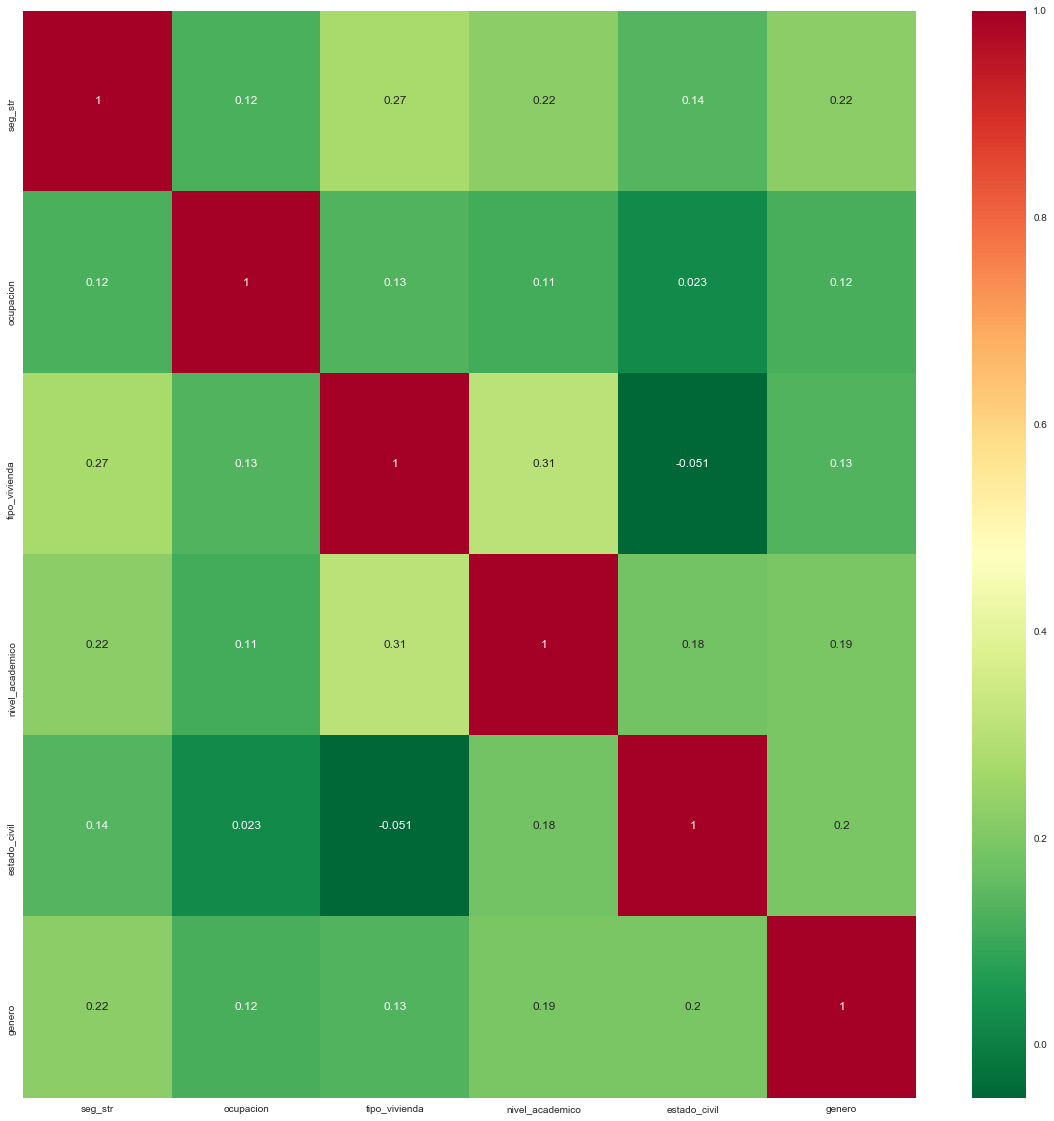

In [37]:
#gráfico de correlación
corr_new = df_filtrado.corr()
plt.rcParams['figure.figsize'] = (20.0, 20.0)
sns.heatmap(corr_new,cmap='RdYlGn_r',annot=True)

Comprobemos el promedio de seg_str en función de su ocupacion

In [38]:
ocupacion_pivot = df_filtrado.pivot_table(index='ocupacion', values='seg_str', aggfunc='mean')
ocupacion_pivot

,seg_str
ocupacion,
0,0.073098
1,3.814815
2,2.383544
3,2.070806
4,0.679665
5,2.281041
6,2.687641
7,1.153942
8,1.253539


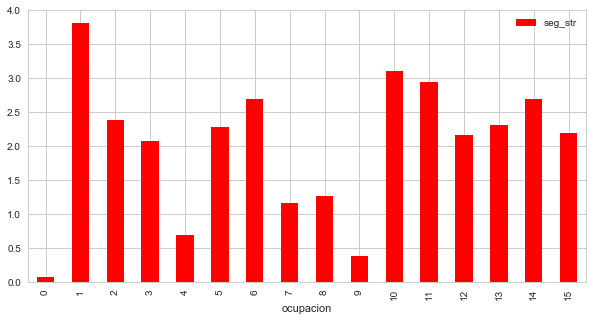

In [39]:
ocupacion_pivot.plot(kind='bar',color='red', figsize=(10,5))

Comprobemos el promedio de seg_str en función de su tipo de vivienda

In [40]:
tipo_vivienda_pivot = df_filtrado.pivot_table(index='tipo_vivienda', values='seg_str', aggfunc='mean')
tipo_vivienda_pivot

,seg_str
tipo_vivienda,
0,1.743092
1,3.866337
2,2.657143
3,3.000000
4,2.000000
5,2.255597
6,2.132500
7,2.629450
8,2.175416


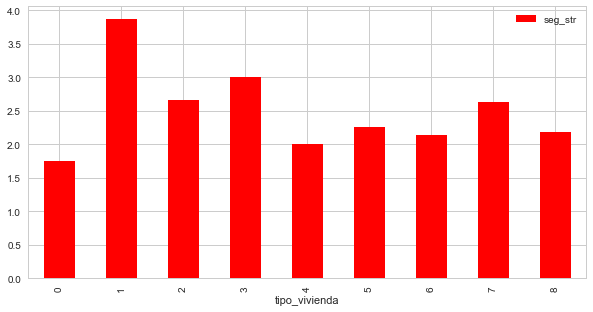

In [41]:
tipo_vivienda_pivot.plot(kind='bar',color='red', figsize=(10,5))

Comprobemos el promedio de seg_str en función de su nivel academico

In [42]:
nivel_academico_pivot = df_filtrado.pivot_table(index='nivel_academico', values='seg_str', aggfunc='mean')
nivel_academico_pivot

,seg_str
nivel_academico,
0,1.119167
1,1.553806
2,2.545254
3,1.864653
4,1.949566
5,1.795817
6,1.800931
7,2.840448
8,1.864519


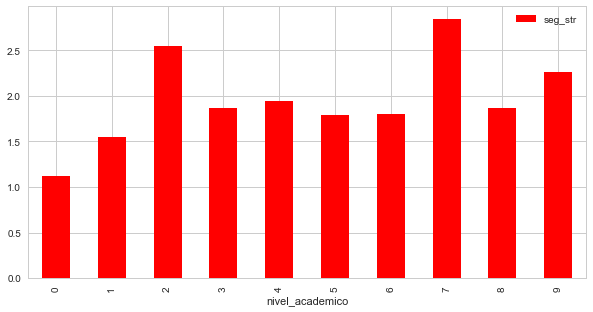

In [43]:
nivel_academico_pivot.plot(kind='bar',color='red', figsize=(10,5))

Comprobemos el promedio de seg_str en función de su estado civil

In [44]:
estado_civil_pivot = df_filtrado.pivot_table(index='estado_civil', values='seg_str', aggfunc='mean')
estado_civil_pivot

,seg_str
estado_civil,
0,0.114776
1,2.252546
2,1.995127
3,1.898319
4,2.432853
5,2.152939
6,2.072751
7,2.432855


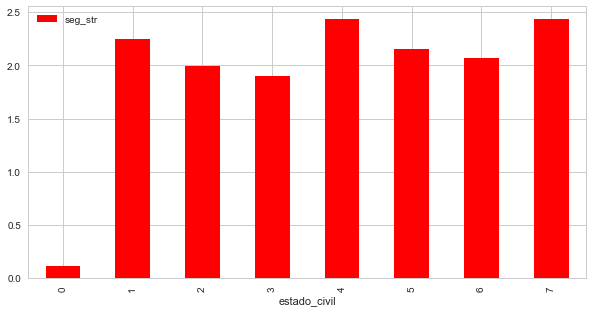

In [45]:
estado_civil_pivot.plot(kind='bar',color='red', figsize=(10,5))

Comprobemos el promedio de seg_str en función de su género

In [46]:
genero_pivot = df_filtrado.pivot_table(index='genero', values='seg_str', aggfunc='mean')
genero_pivot

,seg_str
genero,
0,0.004854
1,2.125707
2,2.242022


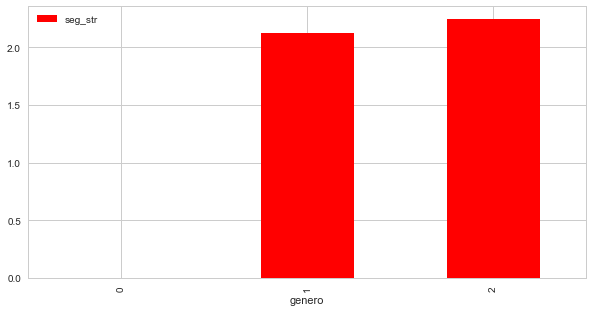

In [47]:
genero_pivot.plot(kind='bar',color='red', figsize=(10,5))

Finalmente, para echar un vistazo rápido a todas las variables en un conjunto de datos, se grafican los histogramas para todas las variables numéricas para determinar si todas las variables están sesgadas.

C:\Users\fm186000\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\fm186000\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\fm186000\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\fm186000\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'norm

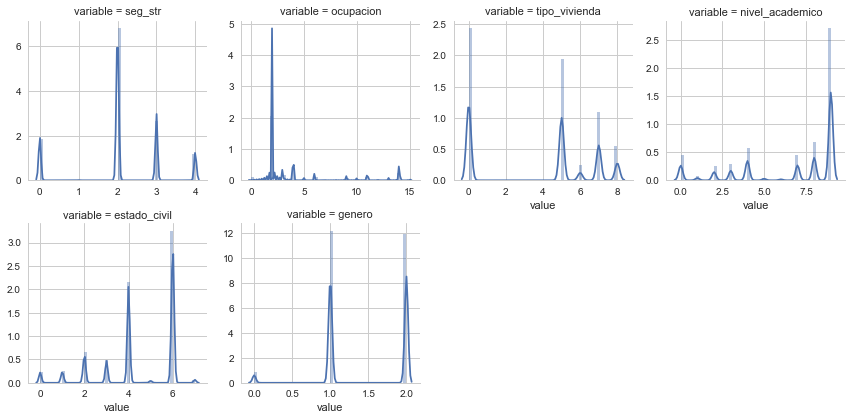

In [48]:
#crear gráficos de las variables numéricas
num = [f for f in df_filtrado.columns if df_filtrado.dtypes[f] != 'object']
nd = pd.melt(df_filtrado, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

De igual manera convertimos a variable numperica el rango de ingresos

In [49]:
df_filtrado['ingreso_rango'].unique()

array(['b. (1.1  2.2MM]', 'c. (2.2  3.3MM]', 'e. (4.4  5.5MM]',
       'h. (7.6  8.7MM]', 'No disponible', 'i. (8.7  Inf)',
       'f. (5.5  6.6MM]', 'g. (6.6  7.6MM]', 'd. (3.3  4.4MM]',
       'a. (0  1.1MM]', '0'], dtype=object)

In [50]:
vals_to_replace = {'0':'0', 
                   'a. (0  1.1MM]':'1',
                   'b. (1.1  2.2MM]':'2',
                   'c. (2.2  3.3MM]':'3',
                   'd. (3.3  4.4MM]':'4',
                   'e. (4.4  5.5MM]':'5',
                   'f. (5.5  6.6MM]':'6',
                   'g. (6.6  7.6MM]':'7',
                   'h. (7.6  8.7MM]':'8',
                   'i. (8.7  Inf)':'9',
                   'No disponible':'10'                   
                  }

In [51]:
df_filtrado['ingreso_rango'] = df_filtrado['ingreso_rango'].map(vals_to_replace)

In [52]:
df_filtrado['ingreso_rango'].unique()

array(['2', '3', '5', '8', '10', '9', '6', '7', '4', '1', '0'],
      dtype=object)

In [53]:
df_filtrado['ingreso_rango'] = df_filtrado['ingreso_rango'].astype(int) 

In [54]:
df_filtrado.dtypes

id_trn_ach         object
id_cliente         object
fecha              object
hora               object
valor_trx          object
ref1               object
ref2               object
ref3               object
sector             object
subsector          object
descripcion        object
seg_str             int64
ocupacion           int64
tipo_vivienda       int64
nivel_academico     int64
estado_civil        int64
genero              int64
edad               object
ingreso_rango       int32
dtype: object

Finalmente, dejamos un dataframe con 7 variables numéricas y 12 variabes categóricas o solo texto

In [56]:
#separar variables en nuevos dataframes
numeric_data = df_filtrado.select_dtypes(include=[np.number])
cat_data = df_filtrado.select_dtypes(exclude=[np.number])
print ("Hay {} variables numéricas y {} columnas categóricas en el dataset".format(numeric_data.shape[1],cat_data.shape[1]))

Hay 7 variables numéricas y 12 columnas categóricas en el dataset


### 6. Ingeniería de características

No hay bibliotecas o conjuntos de funciones que pueda usar para diseñar nuevas caracterísiticas o atributos.  Principalmente es una tarea manual. La ingeniería de funciones requiere conocimientos de dominio y muchas ideas creativas. Las ideas para las nuevas características generalmente se desarrollan durante las etapas de exploración de datos y generación de hipótesis. ***El objetivo de la ingeniería de características es crear nuevas características que pueden ayudar a hacer predicciones mejores.***

Como también se puede ver, hay un alcance masivo de ingeniería de características en este conjunto de datos. Se pueden crear nuevas características a partir de la lista de 11 características. Esta sección se debe seguir cuidadosamente.

La mayoría de las variables categóricas tienen una distribución de varianza cercana a cero. La distribución de varianzas cercanas a cero es cuando una de las categorías en una variable tiene > 90% de los valores. Se pueden crear algunas variables binarias que representen la presencia o ausencia de una categoría. Las nuevas características contendrán 0 o 1 valores. Además, se pueden crear algunas variables más que se explquen por sí mismas con comentarios.

In [93]:
df_segurosScaler = df_filtrado.drop(['id_trn_ach','id_cliente','fecha','hora','valor_trx','genero','ref1','ref2','ref3','sector','subsector','descripcion','edad'], 1,)

In [94]:
df_segurosScaler.shape

(11853782, 6)

In [95]:
X = df_segurosScaler.values

Como tenemos variables con diferentes unidades de medida estandarizaremos las variables.

In [96]:
from sklearn.preprocessing import StandardScaler
#estandarizo las variables
seed = 10
scaler = StandardScaler()
scaler.fit(X)
X =scaler.transform(X)

C:\Users\fm186000\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\fm186000\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [97]:
X

array([[-0.10109762,  1.62987845,  1.06488676,  0.75816244, -0.26351825,
        -1.05198197],
       [-0.10109762,  1.62987845,  1.06488676,  0.75816244, -0.26351825,
        -1.05198197],
       [-0.10109762,  1.62987845,  1.06488676,  0.75816244, -0.26351825,
        -1.05198197],
       ...,
       [-0.10109762, -0.50272043, -1.1970398 ,  0.75816244,  0.89498454,
        -0.68750602],
       [-0.10109762, -0.23614557, -1.1970398 ,  0.75816244,  0.89498454,
        -1.41645793],
       [-0.10109762, -0.23614557, -1.1970398 , -0.22419759,  0.89498454,
        -1.41645793]])

Comenzamos a analizar la variable descripción para iniciar proceso de categorización

In [64]:
df_filtrado['descripcion'].unique()

array(['\\N',
       'Actividades ejecutivas de la administración pública en municipios',
       'Actividades ejecutivas de la administración pública en gobierno central',
       'Actividades de telecomunicaciones inalámbricas',
       'Edición de Revistas', 'Servicios de telefonía fija',
       'Otras actividades auxiliares de las actividades de servicios financieros n.c.p.',
       'Actividades ejecutivas de la administración publica',
       'Bancos comerciales', 'Generación de energía eléctrica',
       'Actividades de otras asociaciones n.c.p.',
       'Actividades legislativas de la administración pública en municipios',
       '', 'Enseñanza cultural',
       'Fabricación de productos farmacéuticos sustancias químicas medicinales y productos botánicos de uso farmacéutico',
       ' TURISMO Y AGENCIAS DE TURISMOActividades de operadores turísticos',
       'Edición de periódicos revistas y otras publicaciones periódicas',
       'Actividades de seguridad social de afiliación obli

Se crea un CountVectorizer para el conteo de palabras

In [65]:
from sklearn import feature_extraction

# Create a CountVectorizer for parsing/counting words
count_vectorizer = feature_extraction.text.CountVectorizer(
    ngram_range=(1, 2),
    #stop_words='english',
    token_pattern="\\b[a-z][a-z]+\\b",
    min_df=1,
)

count_vectorizer.fit(df_filtrado['descripcion'].unique())
counts = count_vectorizer.transform(df_filtrado['descripcion'].unique())
print(counts.shape)

(162, 718)


In [66]:
df_filtrado.count()

id_trn_ach         11853782
id_cliente         11853782
fecha              11853782
hora               11853782
valor_trx          11853782
ref1               11853782
ref2               11853782
ref3               11853782
sector             11853782
subsector          11853782
descripcion        11853782
seg_str            11853782
ocupacion          11853782
tipo_vivienda      11853782
nivel_academico    11853782
estado_civil       11853782
genero             11853782
edad               11853782
ingreso_rango      11853782
dtype: int64

In [67]:
feature_names = count_vectorizer.get_feature_names()
print('number of features: {}'.format(len(feature_names)))
print('random set of features: {}'.format(np.random.choice(feature_names, size=10)))

number of features: 718
random set of features: ['preparados de' 'de personal' 'otras formas' 'obras de' 'sin' 'fondos'
 'mesa de' 'investigaciones' 'con' 'animales']


In [68]:
len(feature_names)

718

In [69]:
word_counts = np.sum(counts, axis=0)
print(word_counts.shape)
df_range = np.arange(1,100)
df_counts = []
for i in df_range:
    this_count = np.sum(word_counts >= i)
    df_counts.append(this_count)

(1, 718)


Usamos dos diferentes técnicas para categorizar texto (TF-IDF y LDA).

Se puede vosualizar en los resutados que los topis encontrados depende mucho de como se parametizan las varoables se las algoritmos, tales como:

* n_samples
* n_features
* n_components
* n_top_words
* max_df
* min_df

In [75]:
from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

n_samples = len(df_filtrado['descripcion'].unique())
n_features = len(feature_names)
n_components = 10
n_top_words = 2
data_samples = df_filtrado['descripcion'].unique()


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features
                                   #stop_words='english'
                                  )
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features
                                #stop_words='english'
                               )
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()



# Fit the NMF model - Frobenius norm - tf-idf features
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)




# Fit the NMF model - generalized Kullback-Leibler divergence - tf-idf features
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)



# Fit the LDA model - tf features
print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Extracting tf-idf features for NMF...
done in 0.000s.
Extracting tf features for LDA...
done in 0.016s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=162 and n_features=718...
done in 0.047s.

Topics in NMF model (Frobenius norm):
Topic #0: actividades de
Topic #1: por comercio
Topic #2: fabricación de
Topic #3: administración la
Topic #4: educación básica
Topic #5: productos otros
Topic #6: construcción de
Topic #7: agencias turismo
Topic #8: transporte carga
Topic #9: servicios de

Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=162 and n_features=718...
done in 0.094s.

Topics in NMF model (generalized Kullback-Leibler divergence):
Topic #0: de actividades
Topic #1: por comercio
Topic #2: fabricación de
Topic #3: la administración
Topic #4: otras educación
Topic #5: productos otros
Topic #6: de construcción
Topic #7: las turismo
Topic #8: muebles transporte
Topic #9: servicios otros

Fitting LDA models with tf

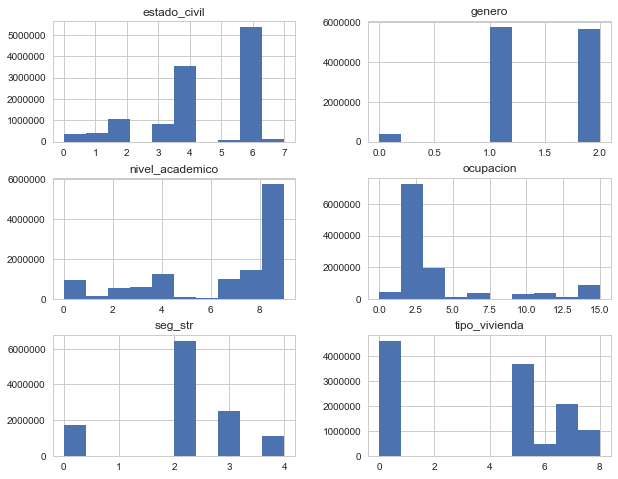

In [79]:
df_filtrado.drop(['ingreso_rango'],1).hist()
plt.show()

### 7. Modelo de capacitación y evaluación

Dado que los datos están listos, se comenzara  a entrenar modelos ahora.

### Clustering (K-MEANS)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
sns.pairplot(df_filtrado.dropna(), hue='ingreso_rango',size=4,
             vars=["estado_civil","nivel_academico","ocupacion"],
             kind='scatter')

In [ ]:
X = np.array(df_filtrado[["estado_civil","nivel_academico","ocupacion"]])
y = np.array(df_filtrado['ingreso_rango'])
X.shape

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [ ]:
# Getting the values and plotting it
C = kmeans.cluster_centers_

f1 = df_filtrado['nivel_academico'].values
f2 = df_filtrado['ocupacion'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#Relizando una proyección lineal con método de reducción de dimensionalidad

plt.figure(figsize=(15,3))

unit_vector = lambda angle: np.array([np.cos(angle), np.sin(angle)])

In [ ]:
pca = PCA(n_components=2) 
pca.fit(df_filtrado[['seg_str','ocupacion','tipo_vivienda','nivel_academico','estado_civil','genero','ingreso_rango']])
print("sklearn PCA components")
print(pca.components_)

In [ ]:
%timeit pca.fit(df_filtrado[['seg_str','ocupacion','tipo_vivienda','nivel_academico','estado_civil','genero','ingreso_rango']])

In [ ]:
d_trans = pca.transform(df_filtrado[['seg_str','ocupacion','tipo_vivienda','nivel_academico','estado_civil','genero','ingreso_rango']])

In [ ]:
d_trans_df = pd.DataFrame(d_trans)
d_trans_df.index = df_filtrado[['seg_str','ocupacion','tipo_vivienda','nivel_academico','estado_civil','genero','ingreso_rango']].index
d_trans_df.columns = ['PC1','PC2']
d_trans_df.head()

In [ ]:
print(pca.explained_variance_ratio_) 

In [ ]:
from sklearn.preprocessing import normalize

d_trans_df['insurance_mean'] = pd.Series(df_filtrado[['seg_str','ocupacion','tipo_vivienda','nivel_academico','estado_civil','genero','ingreso_rango']].mean(axis=1), index=d_trans_df.index)
insurance_mean_max = d_trans_df['insurance_mean'].max()
insurance_mean_min = d_trans_df['insurance_mean'].min()
insurance_mean_scaled = (d_trans_df.insurance_mean-insurance_mean_min) / insurance_mean_max
d_trans_df['insurance_meann_scaled'] = pd.Series(
    insurance_mean_scaled, 
    index=d_trans_df.index)
d_trans_df.head()

In [ ]:
km = KMeans(n_clusters=7, random_state=1234)
y = km.fit(df_filtrado[['seg_str','ocupacion','tipo_vivienda','nivel_academico','estado_civil','genero','ingreso_rango']].values)
X = pca

In [ ]:
clusters = km.fit(df_filtrado[['seg_str','ocupacion','tipo_vivienda','nivel_academico','estado_civil','genero','ingreso_rango']])

In [ ]:
d_trans_df['cluster'] = pd.Series(clusters.labels_, index=d_trans_df.index)
d_trans_df

In [ ]:
axk =d_trans_df.plot(
    kind='scatter',
    x='PC2',y='PC1',
    c=d_trans_df.cluster.astype(np.float), 
    figsize=(16,8))

for i, personas in enumerate(df_filtrado[['seg_str','ocupacion','tipo_vivienda','nivel_academico','estado_civil','genero','ingreso_rango']].index):
    axk.annotate(personas, (d_trans_df.iloc[i].PC2 + 2, d_trans_df.iloc[i].PC1 + 2))